# 1. Descriptive Statistics

<hr>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tr = pd.read_csv('https://raw.githubusercontent.com/angkasatech/ds/37146328bc5814f4e7a0adb739e6574def32b6dc/banking_train.csv', delimiter=';')
#df_ts = pd.read_csv('Banking/test.csv', delimiter=';')

In [3]:
df_tr.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Info ###

In [4]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Numerical Data Describe ###

In [5]:
df_tr.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Categorical Data Describe ###

In [6]:
df_tr['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [7]:
df_tr['marital'].describe()

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

In [8]:
df_tr['education'].describe()

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

In [9]:
df_tr['default'].describe()

count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object

In [10]:
df_tr['housing'].describe()

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

In [11]:
df_tr['loan'].describe()

count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object

In [12]:
df_tr['contact'].describe()

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object

In [13]:
df_tr['month'].describe()

count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object

In [14]:
df_tr['poutcome'].describe()

count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object

### Little Observation ###

In [15]:
df_tr[df_tr['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [16]:
df_tr[df_tr['pdays']==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [17]:
#Kalau pdays-nya -1, previous-nya pasti 0, poutcome pasti unknown
df_tr[df_tr['pdays']==-1]['previous'].value_counts()

0    36954
Name: previous, dtype: int64

In [18]:
# Ada berapa banyak client yang belum dikontak 'lagi' 
df_tr[df_tr['pdays']==-1]['pdays'].count()

36954

In [19]:
# Metode untuk menghubungi client ada apa saja?
df_tr['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [20]:
# Ada jenis pendidikan apa saja pada kolom education
df_tr['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [21]:
# Ada jenis pekerjaan apa saja dalam kolom job
df_tr['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

### Brief Visualization on Numerical Data ###

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

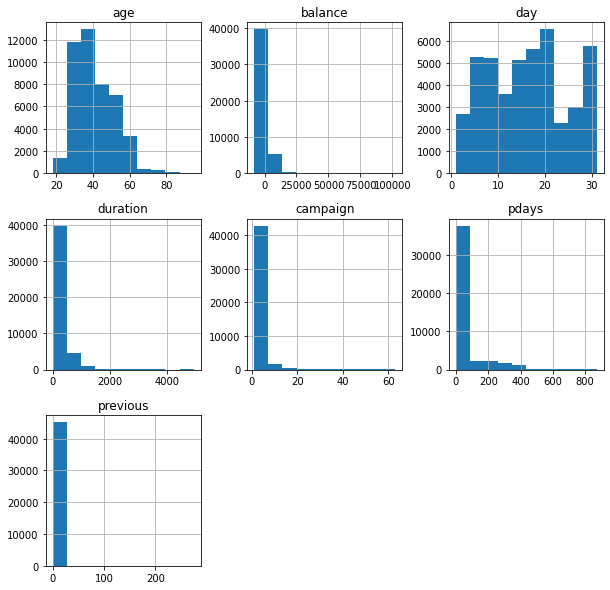

In [22]:
df_tr.hist(figsize=(10,10))

### Jawaban: ###

a. Secara tipe data sudah sesuai, tetapi ada kolom yang nilainya mungkin butuh perhatian khusus. 
>Kolom balance yang seharusnya menampung nilai rerata saldo(balance) tahunan ada yang bernilai negatif dan mungkin ini disebabkan tanggungan seperti biaya administratif bank yang sudah menumpuk (hanya asumsi). 

>Kolom pdays memiliki kondisi khusus di mana nilai -1 berarti client belum pernah di-contact dan ini tentunya mempengaruhi nilai mean, percentile, serta standar deviasi keseluruhan. Ke depannya, pun sepertinya butuh penangan khusus.

>Pada kolom duration terdapat 3 baris data dengan nilai 0 (poutcome = unknown) yang tipe contact-nya juga bertipe 'unknown', sepertinya baris seperti ini bisa dihilangkan saja karena kemungkinan client tidak menerima panggilan dan validitasnya kurang dapat dipastikan(?)

>Untuk ke depannya, kolom - kolom dengan nilai 'unknown' mungkin bisa diberikan penanganan khusus, terutama jika kolom tersebut banyak yang mengandung nilai 'unknown'

b. Tidak ada kolom yang memiliki nilai kosong/null

c. Kolom balance memiliki nilai min yang bernilai -8019 dan max sebesar 102127 dan jika dilihat dari percentile 75% bernilai 1428, data balance bersifat skewed positive (Mungkin bisa diterapkan rescaling). Kolom pdays memiliki nilai min, Q1, Q2, dan Q3 yang bernilai -1, ini berarti sebagian besar dari client belum dihubungi 'lagi' oleh pihak campaign marketing.

>Tambahan:
Kolom month yang berisi nama bulan bisa saja diubah menjadi angka(int) yang mewakili bulan (jan ->1, des-> 12) (Label encoding))
Begitu juga untuk kolom default, housing, loan, dan y yang bertipe binary(yes/no) menjadi 0 dan 1

# 2. Univariate Analysis

## Membagi data berdasarkan tipe

In [23]:
cats = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
nums = ['age','balance','day','duration','campaign','pdays','previous']

## Box Plot

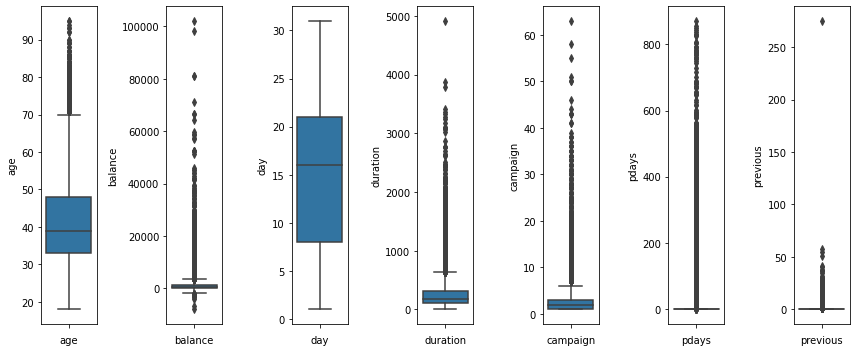

In [24]:
# kolom numerical dengan boxplot
features = nums
plt.figure(figsize=(12,5))

for i in range(0, len(nums)):
    plt.subplot(1,len(features) , i+1)
    sns.boxplot(y=df_tr[features[i]], orient='v')
    plt.xlabel(features[i])
    plt.tight_layout()

Pengamatan:

1. Berdasarkan boxplot terdeteksi outlier hampir di seluruh kolom, yaitu pada kolom age, balance, duration, campaign, pdays, dan previous.
2. Kolom age terlihat cenderung skewed, dan kolom balance, duration, campaign, pdays, serta previous sangat jelas terlihat bahwa pola distribusinya skewed.

## Dist Plot

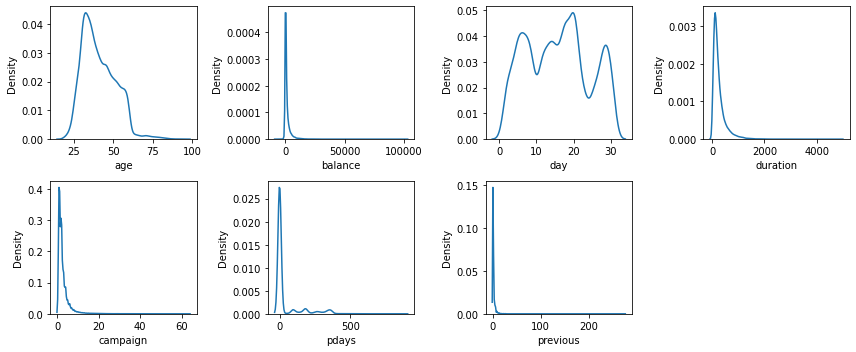

In [25]:
# kolom numerical dengan distplot
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df_tr[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Pengamatan:

Distplot menegaskan analisa boxplot, yaitu sebaran data hampir seluruhnya positively skewed, kecuali pada kolom day yang cenderung normal.

## Violin Plot

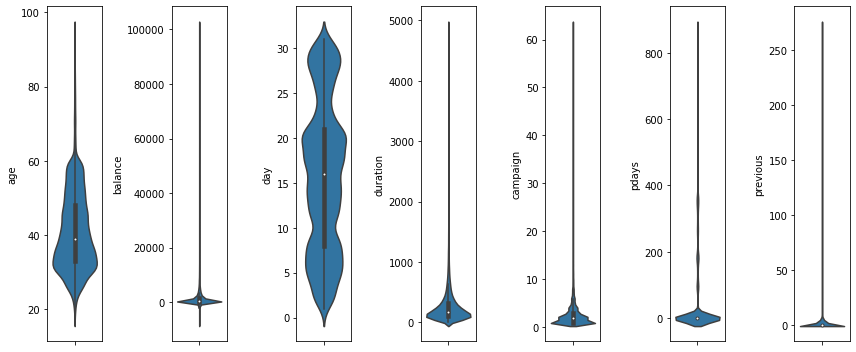

In [26]:
# kolom numerical dengan violinplot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df_tr[nums[i]], orient='v')
    plt.tight_layout()

Pengamatan:
   
1. Violin plot merupakan gabungan dari boxplot dan distplot, terlihat bahwa kolom age cenderung skewed. Kolom balance, duration, campaign, pdays, dan previous terlihat sangat skewed (positively). Kolom day cenderung normal.
2. Berdasarkan hasil analisa boxplot, distplot, dan violin plot, didapatkan bahwa data numerical perlu untuk outlier handling, log/exp transformation, dan normalisasi/standardisasi.

## Count Plot

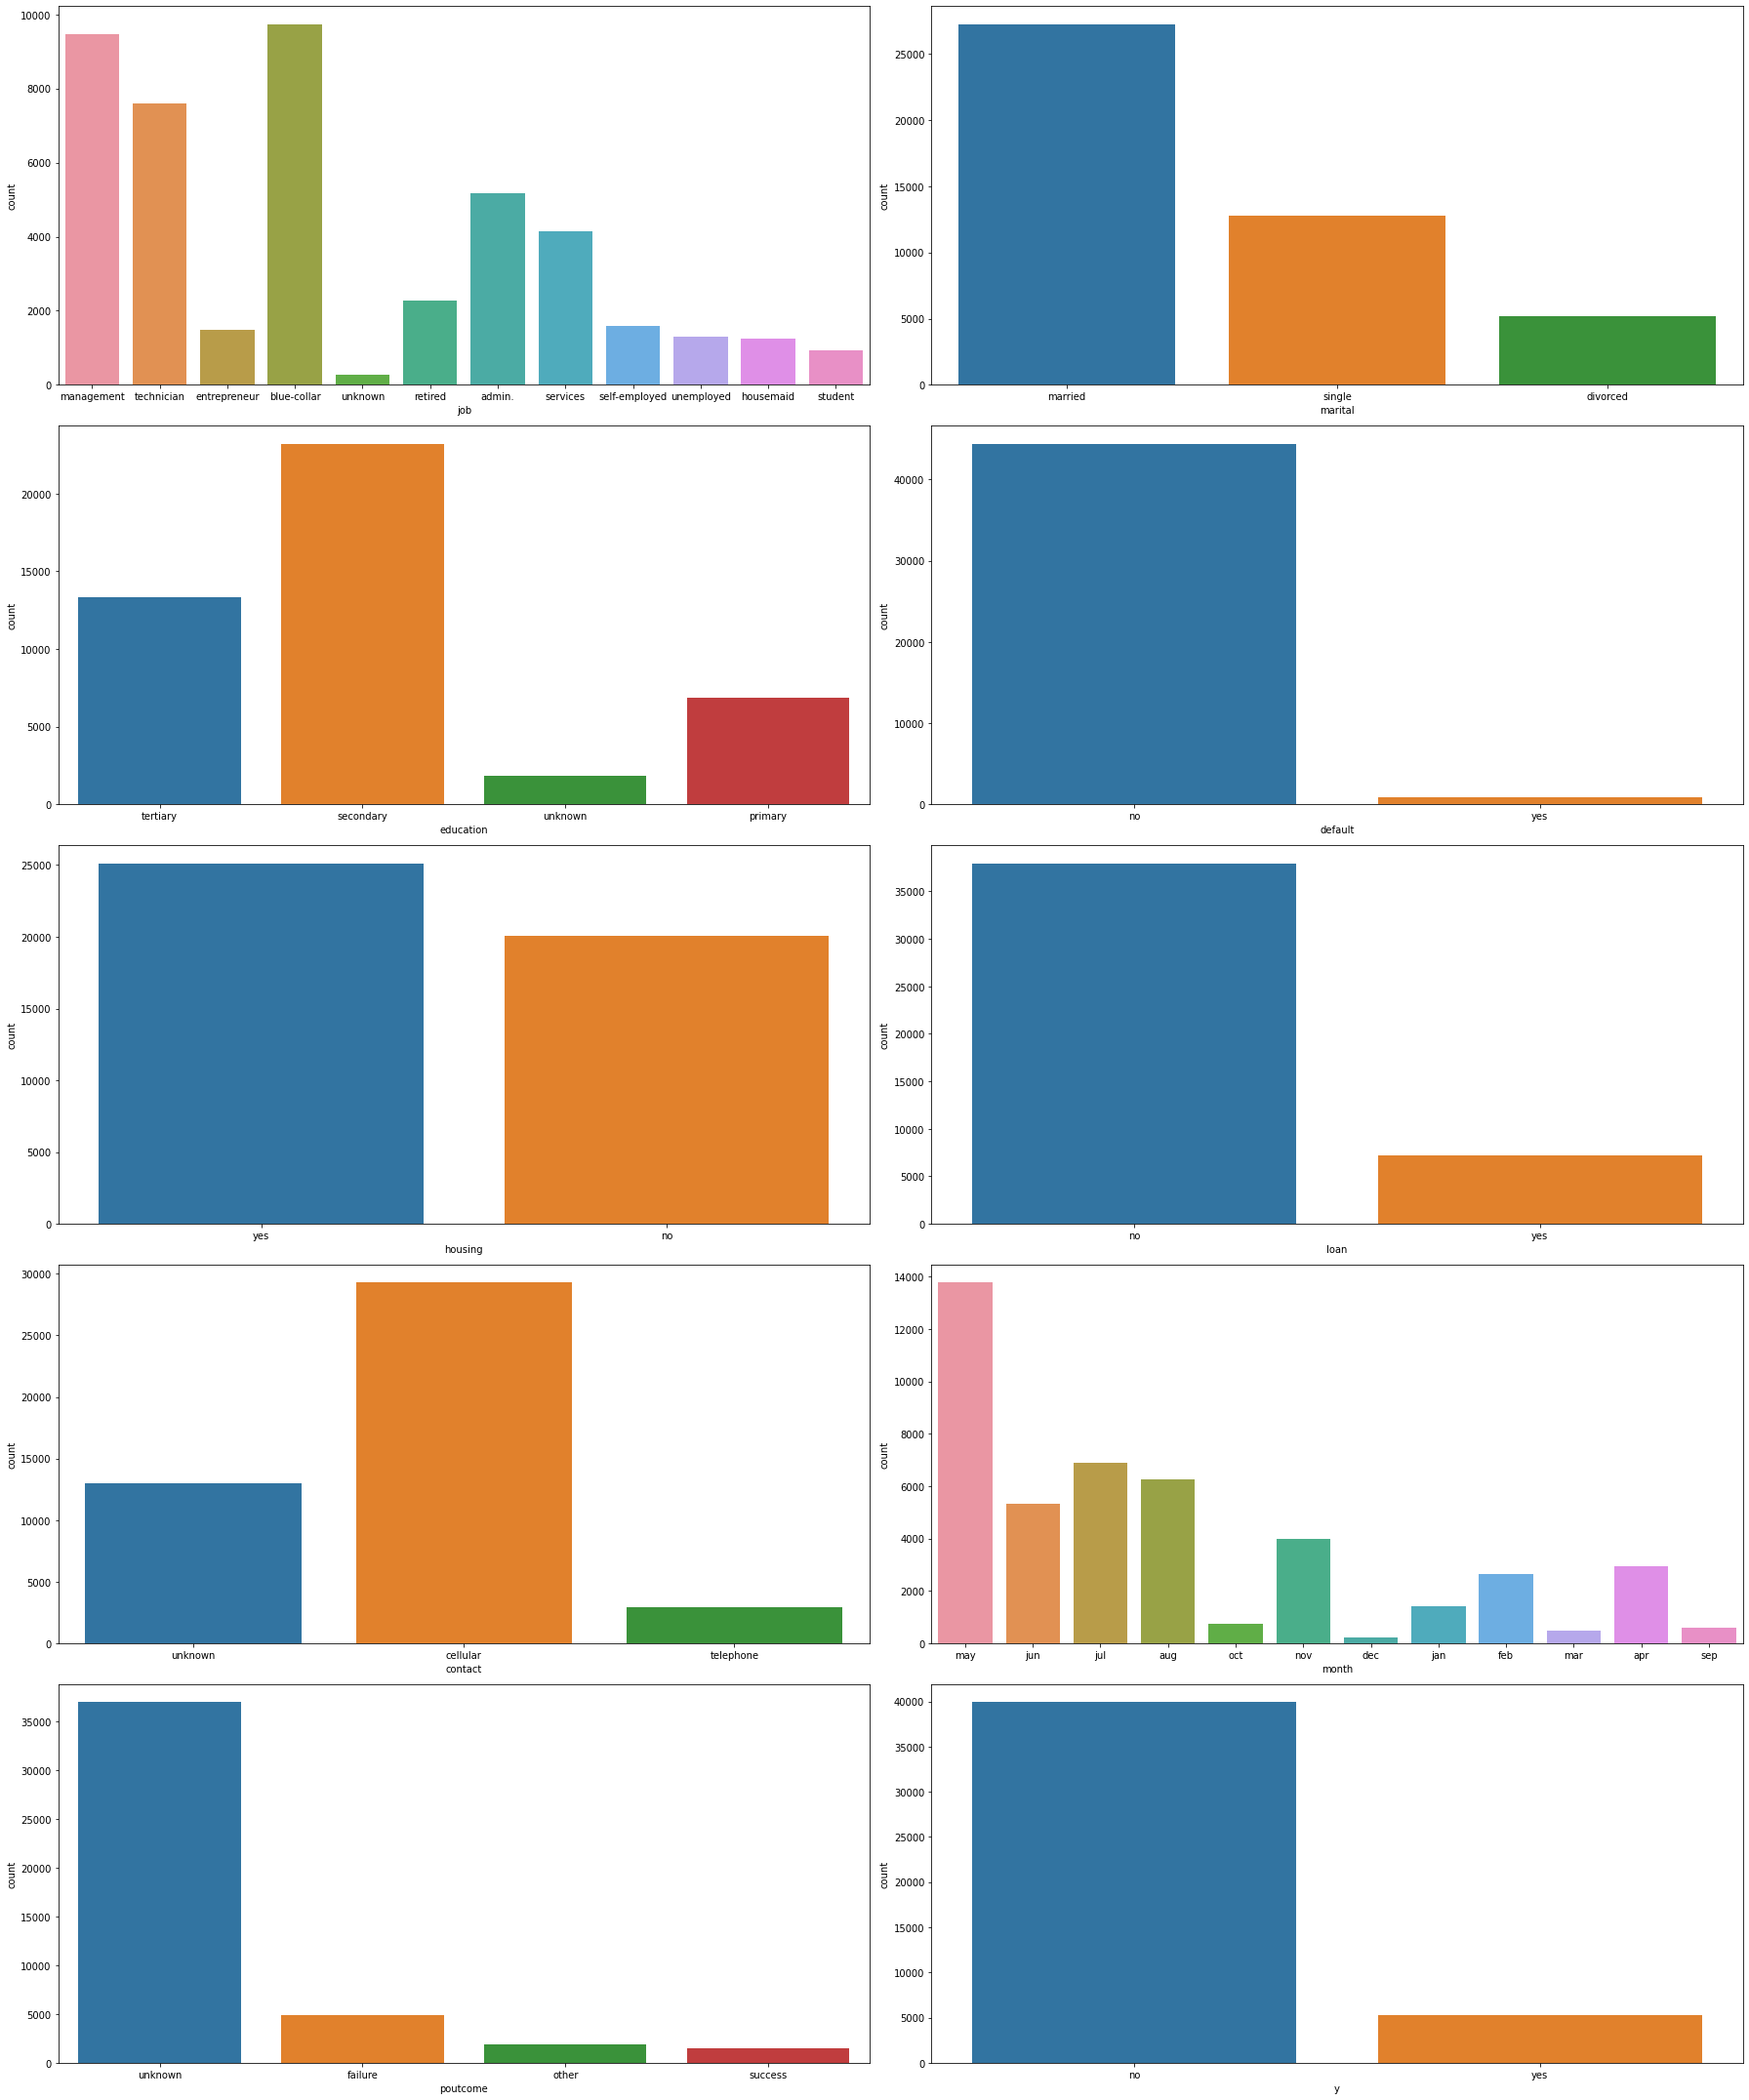

In [27]:
# kolom categorical dengan countplot
plt.figure(figsize=(25, 30))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x = df_tr[cats[i]])
    plt.tight_layout()

Pengamatan:

1. Kolom job dan month menunjukkan kardinalitas (jumlah unique values) yang cukup tinggi.
2. Status pernikahan nasabah didominasi oleh yang telah menikah.
3. Mayoritas jenjang pendidikan adalah secondary, tidak memiliki credit in default, memiliki pinjaman rumah, dan memiliki pinjaman pribadi.
4. Mayoritas komunikasi dilakukan dengan seluler dan bulan terakhir kali nasabah dihubungi CS kebanyakan adalah mei. 
5. Hasil campaign sebelumnya mayoritas tidak diketahui, diluar itu jumlah campaign yang gagal lebih banyak dari yang berhasil.
6. Hasil akhirnya, berdasarkan data yang ada, nasabah yang membuka rekening deposito jauh lebih sedikit daripada yang tidak membuka.
7. Kolom month dan job didrop saja karena jumlah unnique value terlalu banyak.
7. Perlu encoding untuk kolom - kolom categorical, yaitu default, housing, loan, dan y menggunakan label encoding, marital, education, contact, dan poutcome menggunakan one hot encoding.

# 3. Multivariate (Bivariate) Analysis

### Menambahkan kolom baru dari konversi kolom y ###

In [28]:
#melakukan iterasi untuk penambahan kolom deposito (dari Yes/No menjadi 1/0)
def deposito(x):
    if x['y'] == 'yes':
        deposito = 1
    else:
        deposito = 0
    return deposito  

In [29]:
#menambahkan kolom konverted hasil iterasi
df_tr['deposito'] = df_tr.apply(lambda x:deposito(x), axis=1)
df_tr.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,deposito
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


### Mengkategorikan antara kolom numeric dan categorical ###

In [30]:
#melakukan kategorisasi kolom numerical & categorical
nums = ['age','balance','day','duration','campaign','pdays','previous', 'deposito']
cats = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [31]:
#melihat nilai descriptive setelah kategorisasi kolom numerical
df_tr[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
deposito,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [32]:
#mengecek berapa jumlah baris dengan nilai balance minus (-)
df_tr[df_tr['balance']<0].shape[0]

3766

In [33]:
#melihat nilai descriptive setelah kategorisasi kolom categorical
df_tr[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [34]:
#melihat counts masing2 unique value kolom categorical
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df_tr[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

### Viasualisasi heatmap correlation ###

In [35]:
#melihat korelasi antar fitur dengan target, atau fitur dengan fitur
df_tr.corr()

,age,balance,day,duration,campaign,pdays,previous,deposito
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
deposito,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<AxesSubplot:>

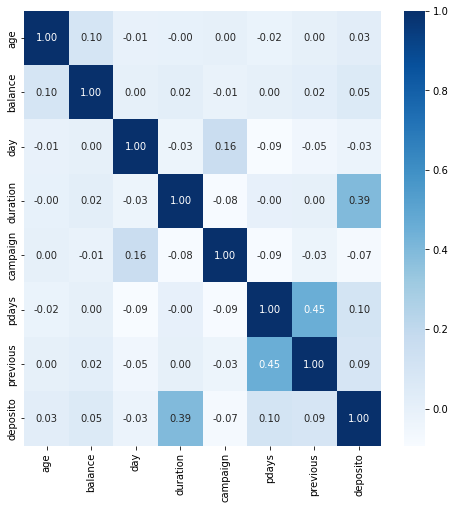

In [36]:
#visualisasi korelasi
plt.figure(figsize=(8, 8))
sns.heatmap(df_tr.corr(), cmap='Blues', annot=True, fmt='.2f')

### Visualisasi pairplot correlation ###

<Figure size 1080x1080 with 0 Axes>

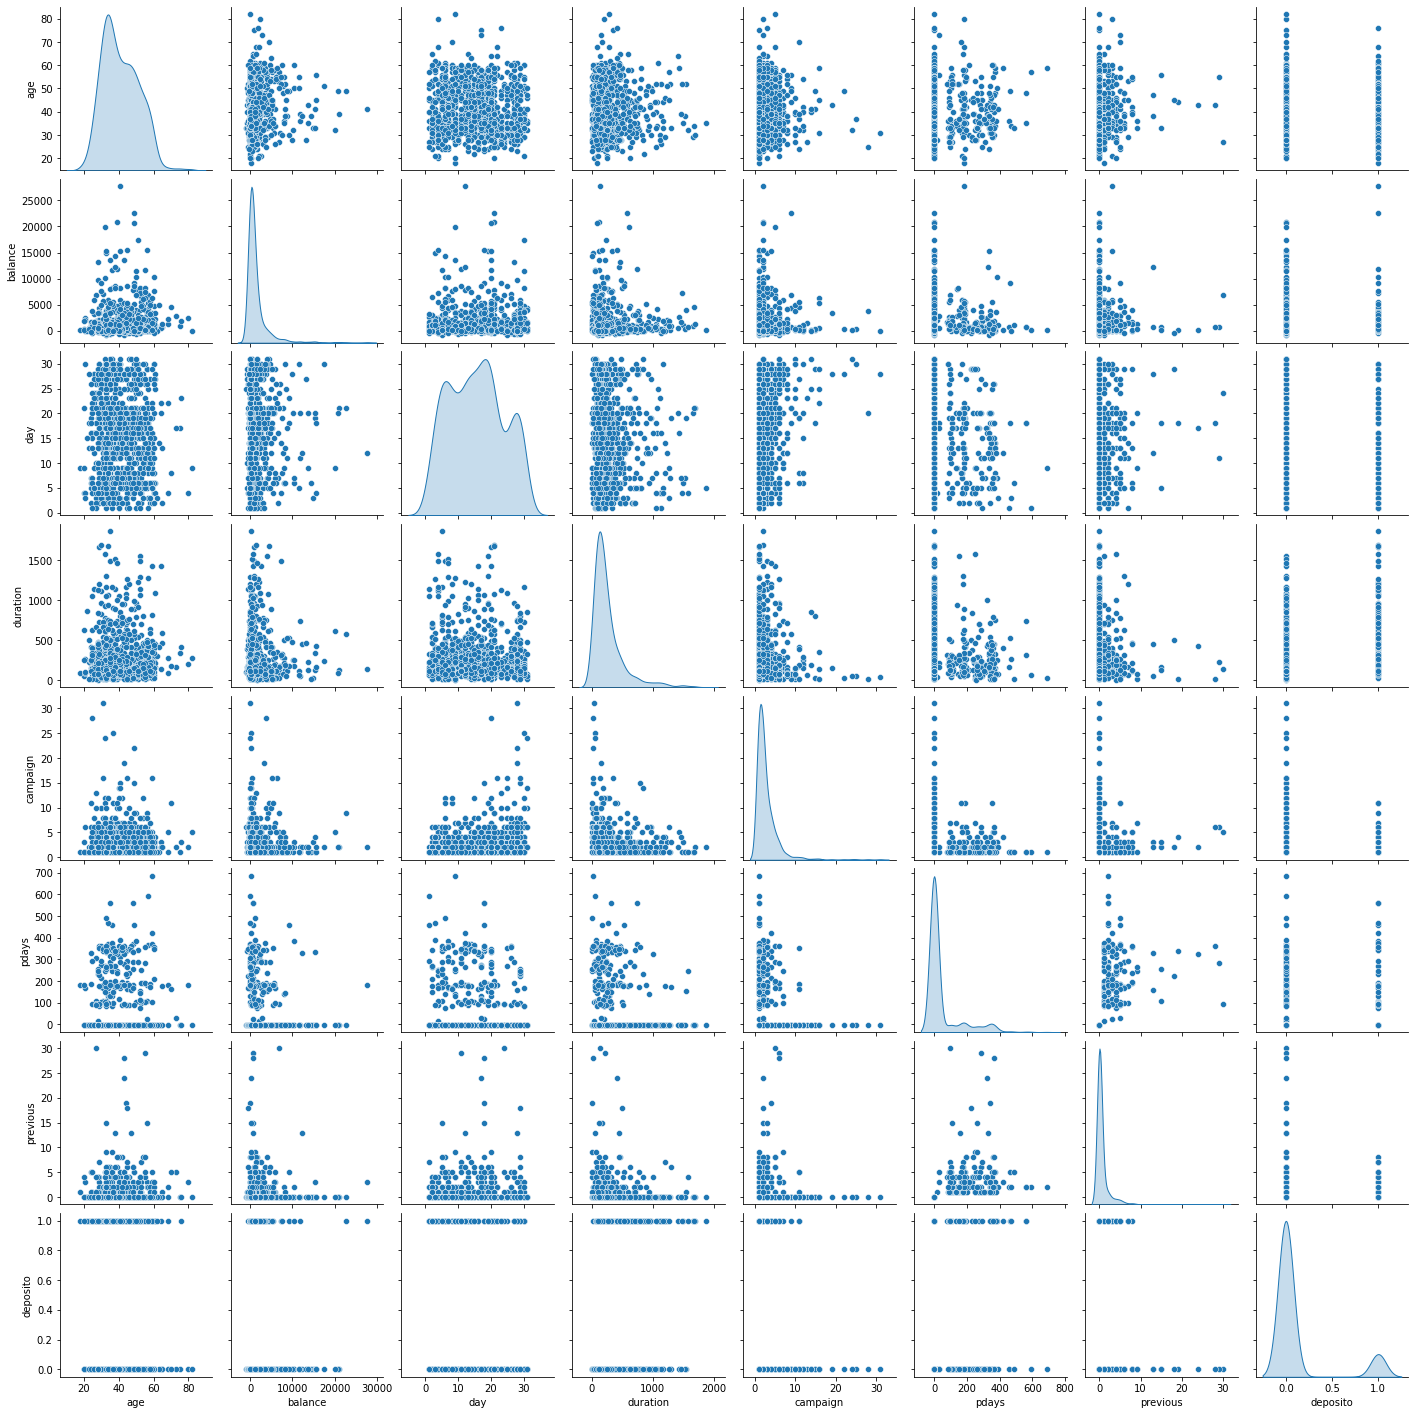

In [37]:
#visuaslisasi pairplot
df_sample = df_tr.sample(1000, random_state=42)
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde')

### Visualisasi antara fitur kategorical dengan target ###

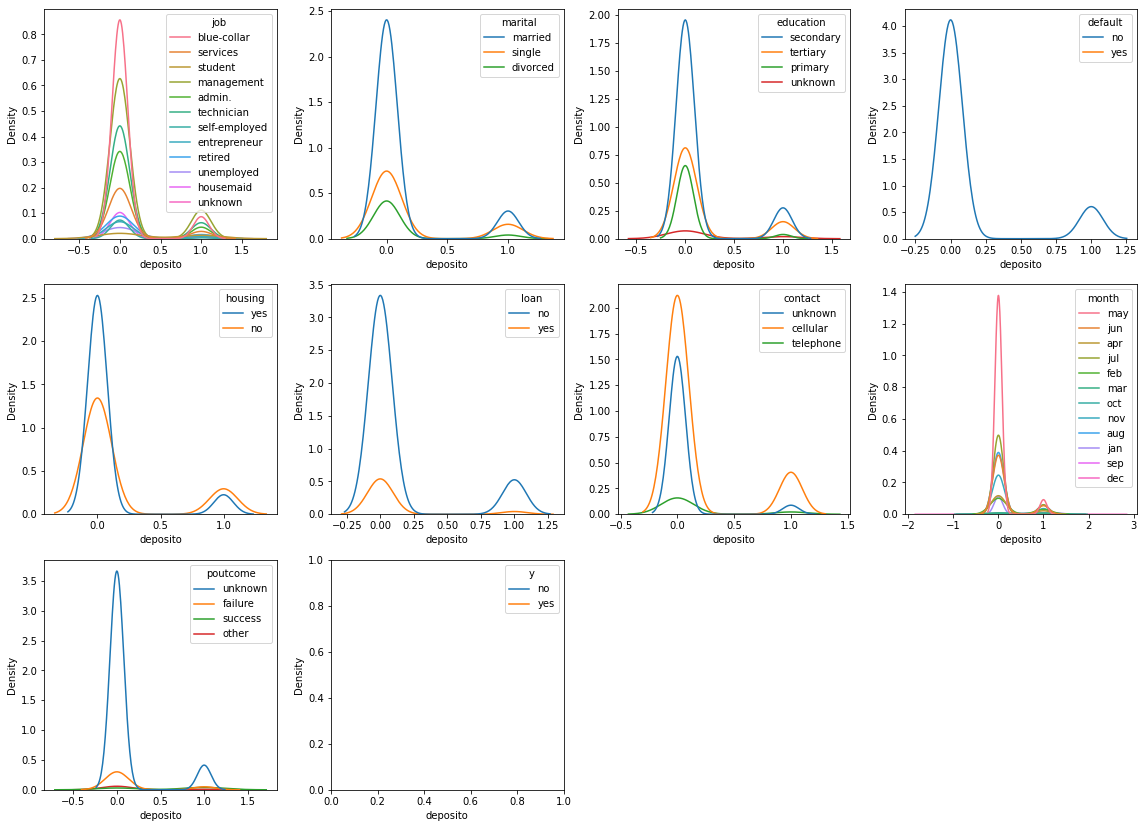

In [38]:
#visualisasi kdeplot antara target (deposito) dengan kolom categorical
features = cats
plt.figure(figsize=(16, 15))
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1) 
    sns.kdeplot(data=df_sample, x='deposito', hue=features[i],warn_singular=False)
    #plt.xlabel(features[i])
    plt.tight_layout()

### Kesimpulan Bivariate Analysis ###

* 3.

  * A.
    * 1) Pada analisis menggunakan heatmap, tidak ditemukan fitur-fitur numeric yang berkorelasi cukup kuat dengan target (desposito). Sehingga tidak dapat ditarik kesimpulan fitur mana yang dapat dipertahankan menggunakan analisis heatmap.
    * 2) Pada analisis menggunakan pairplot terdapat beberapa kemungkinan korelasi antara target dengan beberapa fitur :
      * a. Pada hubungan antara age dengan pembukaan deposito, customer dengan umur yang lebih tinggi cenderung untuk tidak membuka deposito.
      * b. Customer dengan jumlah campaign yang banyak cenderung tidak membuka deposito.
      * c. Beberapa fitur juga menunjukkan adanya korelasi dengan keputusan membuka deposito antara lain previous & duration, namun belum pasti causalitasnya. Perlu direview ulang.
    * 3) Pada analisis category column vs target variable : pada category housing persebaran customer yang memiliki pinjaman perumahan cenderung tidak membuka deposito, sedangkan customer yang tidak memiliki pinjaman perumahan cenderung membuka deposito

  * Fitur yang dapat yang cukup relevan dan dapat dipertahankan antara lain : age, campaign, housing


* 3.
  * B. 
      * 1)  Pada analysis menggunakan heatmap, tidak ditemukan pola dan korelasi yg kuat (>0.7) antar fitur. Meski demikian, antara fitur duration - y (keputusan membuka deposito) dan fitur previous - pdays memiliki korelasi yang lumayan tinggi dan cukup menarik. 
      * 2) Pada analysis menggunakan pairplot, dapat diasusmikan tidak ditemukan pola yang menarik antar fitur.

# 4. Business Insight

### Relationship from 'month' and 'y' parameter

In [39]:
bulan=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [40]:
df_tr['month']=pd.Categorical(df_tr['month'], categories=bulan, ordered=True)

#### for customer that has been take deposit

In [41]:
df_yes=df_tr[df_tr['y']=='yes'].groupby('month')[['y']].count().reset_index()
df_yes

,month,y
0,jan,142
1,feb,441
2,mar,248
3,apr,577
4,may,925
5,jun,546
6,jul,627
7,aug,688
8,sep,269
9,oct,323


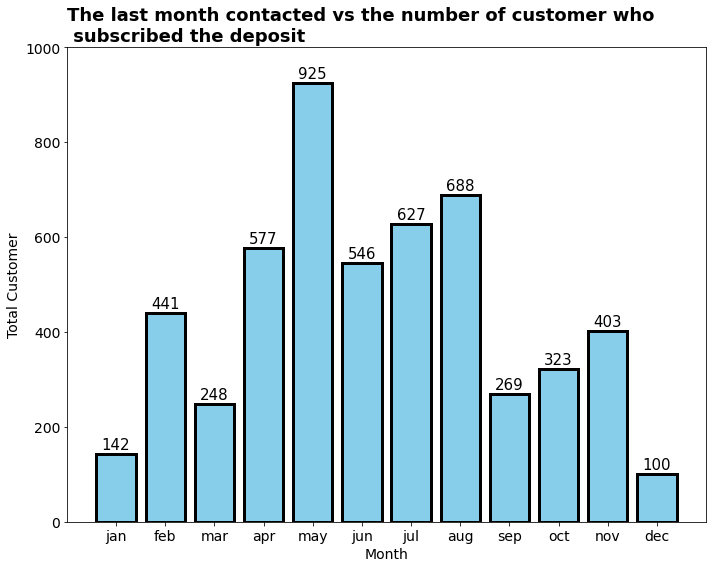

In [42]:
x = df_yes['month']
y = df_yes['y']
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.bar(x=x, height=y, data=df_yes, 
       color = 'skyblue', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

ax.set_title("The last month contacted vs the number of customer who \n subscribed the deposit",color='black',fontsize=18,fontweight='bold', loc='left')
ax.set_ylabel('Total Customer', fontsize=14) # y axis label
ax.set_xlabel('Month', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i], y = y[i]+10, s = y[i], size = 15, ha='center') # add data points
    
ax.set_ylim(0, 1000)
plt.tight_layout()

jumlah customer terbanyak yang mengambil deposit, itu terjadi pada saat telepon marketing dilakukan di bulan may, agustus, juli, april, dan juni.

Namun, kita belum bisa merekomendasikan untuk menggencarkan penelponan marketing pada bulan tersebut. Kita perlu melihat rasio jumlah orang yang menerima deposit dibandingkan dengan jumlah seluruh orang yang ditelpon pada bulan tersebut, untuk menghitung probability, kemungkinan customer menerima tawaran deposit pada bulan tersebut.

Calculate percentage of yes customer form total customer

In [43]:
df2=df_tr['month'].value_counts(sort=False).rename_axis('month').reset_index(name='count')
df2

,month,count
0,jan,1403
1,feb,2649
2,mar,477
3,apr,2932
4,may,13766
5,jun,5341
6,jul,6895
7,aug,6247
8,sep,579
9,oct,738


In [44]:
df_yes['Ratio_Percentage']=round((df_yes['y']/df2['count'])*100,2)
df_yes

,month,y,Ratio_Percentage
0,jan,142,10.12
1,feb,441,16.65
2,mar,248,51.99
3,apr,577,19.68
4,may,925,6.72
5,jun,546,10.22
6,jul,627,9.09
7,aug,688,11.01
8,sep,269,46.46
9,oct,323,43.77


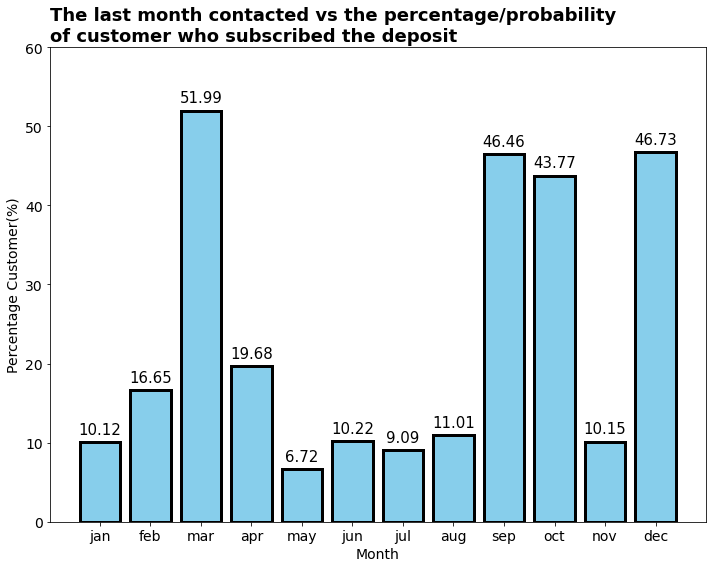

In [45]:
x = df_yes['month']
y = df_yes['Ratio_Percentage']
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.bar(x=x, height=y, data=df_yes, 
       color = 'skyblue', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

ax.set_title("The last month contacted vs the percentage/probability \nof customer who subscribed the deposit",color='black',fontsize=18,fontweight='bold', loc='left')
ax.set_ylabel('Percentage Customer(%)', fontsize=14) # y axis label
ax.set_xlabel('Month', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i], y = y[i]+1, s = y[i], size = 15, ha='center') # add data points
    
ax.set_ylim(0, 60)
plt.tight_layout()

Jika dilihat dari barplot di atas, percentage customer yang mengambil deposit tertinggi, itu terjadi pada saat telepon marketing dilakukan di bulan mar, sep, oct, dan dec

- Sehingga rekomendasi yang bisa dilakukan ialah dengan memperbanyak telepon marketing pada bulan tersebut, karena pada bulan tersebut kemungkinan orang/customer untuk menerima tawaran deposit lebih tinggi dibandingkan bulan-bulan lainnya.
- Perlu juga dibuat perencanaan kembali untuk waktu skenario telepon marketing dilakukan, dengan mempertimbangkan probability/kemungkinan seperti yang ditunjukkan pada grafik diatas dengan melihat waktu terbaik yang memiliki probability terbesar untuk mengambil deposit

### Relationship from the number of 'campaign' vs 'y'

Check distribution campaign for each yes and no customer

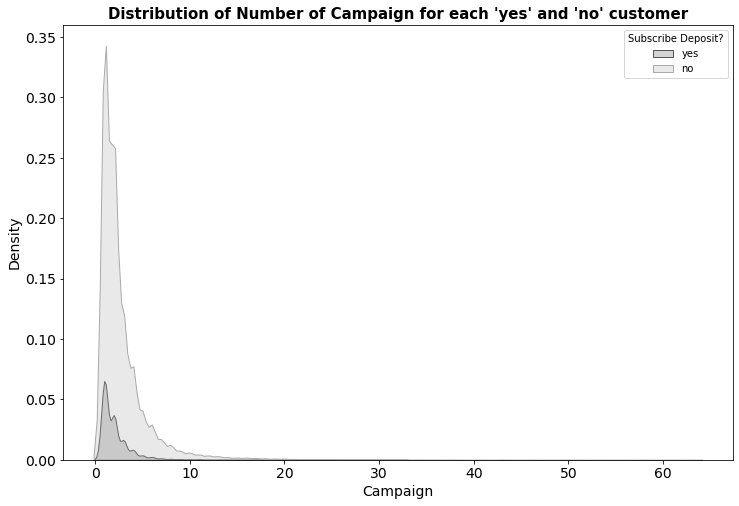

In [46]:
fig, axes=plt.subplots(figsize=(12,8))
sns.kdeplot(data=df_tr, x='campaign', hue='y', ax=axes, fill=True, palette='binary')
plt.title("Distribution of Number of Campaign for each 'yes' and 'no' customer", color='black', size=15, fontweight='bold')
plt.ylabel('Density', fontsize=14) # y axis label
plt.xlabel('Campaign', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(title='Subscribe Deposit?', loc='upper right', labels=['yes', 'no'])
plt.show()

Boxplot to see the Q1, Q2, Q3, min, max value data

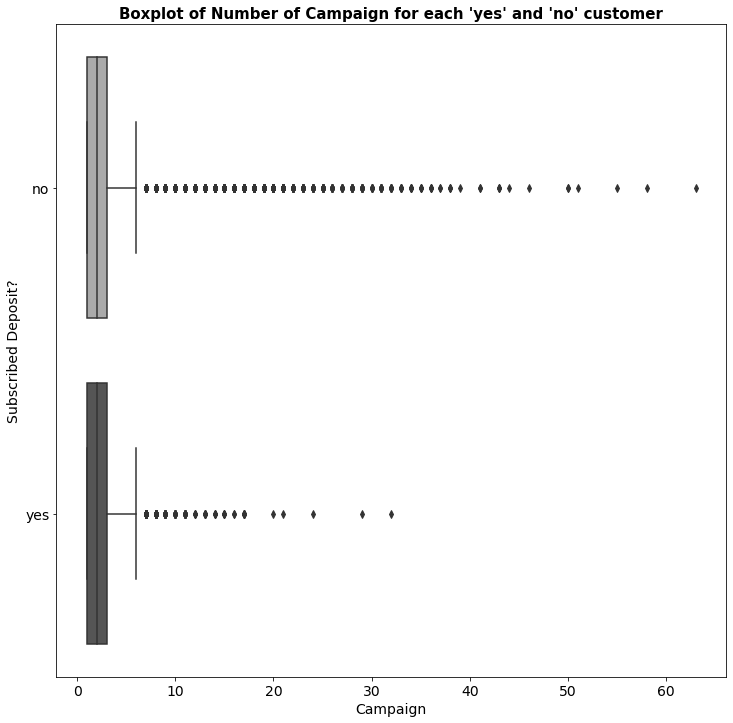

In [47]:
fig, axes=plt.subplots(figsize=(12,12))
sns.boxplot(x='campaign', y='y', data=df_tr, palette="binary", ax=axes)
plt.ylabel('Subscribed Deposit?', fontsize=14) # y axis label
plt.xlabel('Campaign', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title("Boxplot of Number of Campaign for each 'yes' and 'no' customer", color='black', size=15, fontweight='bold')
plt.show()
plt.show()

bisa dilihat berdasarkan grafik distribusi di atas, 

ada dugaan bahwa semakin tinggi jumlah campaign yang dilakukan kepada customer akan semakin berkurang/sedikit jumlah customer baik yang mengambil akun deposit maupun yang tidak mengambil akun deposit.

Setelah melihat grafik distribusi tersebut, kita perlu mengecek dugaan apakah benar, pernyataan "jumlah campaign ini mempengaruhi jumlah customer yang mengambil deposit"?

#### Uji hipotesis

Define the hipothesis

H0: nilai Rata-rata jumlah campaign customer yang membuka akun deposit sama dengan nilai rata-rata jumlah campaign customer yang tidak membuka akun deposit (miu1=miu2)

H1: nilai Rata-rata jumlah campaign customer yang membuka akun deposit tidak sama dengan nilai rata-rata jumlah campaign customer yang tidak membuka akun deposit (miu1 != miu2)

Pengujian yang digunakan menggunakan t-test

In [48]:
#separate yes and no dataset
ya=df_tr[df_tr['y']=='yes']
tidak=df_tr[df_tr['y']=='no']

In [49]:
ya.shape

(5289, 18)

In [50]:
tidak.shape

(39922, 18)

In [51]:
import scipy.stats as st

In [52]:
ttest=st.ttest_ind(a=ya['campaign'], b=tidak['campaign'])
pvalue=ttest.pvalue
print('pvalue =', pvalue) 
if pvalue >= 0.05:
    print('we cant reject the null Hypotesis(H0)')
else:
    print('we can reject the null Hypotesis(H0)')

pvalue = 1.0123473642096295e-54
we can reject the null Hypotesis(H0)


#### Hasil pengujian hipotesis dan Interpretasi

Dari hasil t-test yang dilakukan pada data bank di atas, bisa dilihat bahwa hasilnya adalah kita bisa menolak hipotesis null(H0). Artinya nilai Rata-rata jumlah campaign customer yang membuka akun deposit tidak sama dengan nilai rata-rata jumlah campaign customer yang tidak membuka akun deposit. 

#### Kesimpulannya

- dari hasil t-test di atas, sudah terbukti bahwa **jumlah campaign dapat mempengaruhi keinginan customer untuk mengambil akun deposit atau tidak.**

- Dan setelah dilihat dari distribusi data pada kelompok customer yang mengambil deposit dan kelompok customer yang tidak mengambil deposit, 
menujukkan bahwa **semakin tinggi jumlah campaign yang dilakukan kepada customer akan semakin berkurang/sedikit jumlah customer yang mengambil akun deposit maupun yang tidak mengambil akun deposit.**


#### Rekomendasinya

berdasarkan kesimpulan diatas, bisa dibuat beberapa rekomendasi:
- jumlah campaign yang terlalu banyak tidak memberikan kepastian bahwa customer akan mengambil deposit ataupun tidak mengambil deposit. Sehingga perlu ditentukan jumlah campaign yang optimum, supaya jumlah campaign dapat berkurang dan customer memiliki kepastian untuk mengambil deposit ataupun tidak mengambil deposit.


### Relationship from the 'duration' vs 'y'

Check distribution duration for each yes and no customer

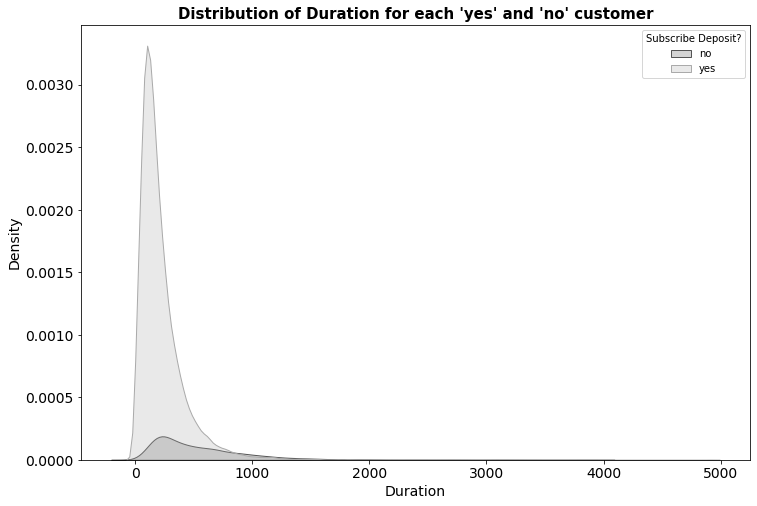

In [53]:
fig, axes=plt.subplots(figsize=(12,8))
sns.kdeplot(data=df_tr, x='duration', hue='y', ax=axes, fill=True, palette='binary', legend=False)
plt.title("Distribution of Duration for each 'yes' and 'no' customer", color='black', size=15, fontweight='bold')
plt.ylabel('Density', fontsize=14) # y axis label
plt.xlabel('Duration', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(title='Subscribe Deposit?', loc='upper right', labels=['no', 'yes'])
plt.show()

Boxplot to see the Q1, Q2, Q3, min, max value data

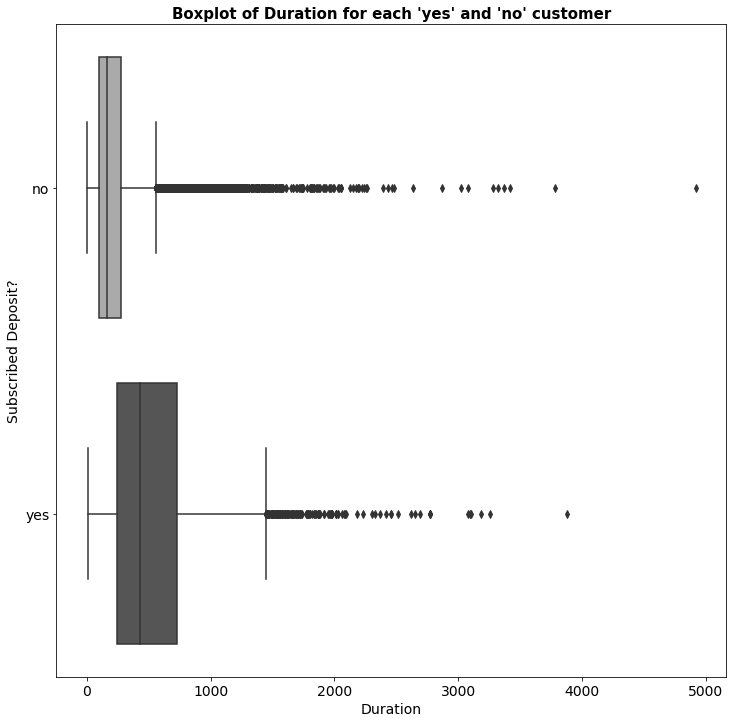

In [54]:
fig, axes=plt.subplots(figsize=(12,12))
sns.boxplot(x='duration', y='y', data=df_tr, palette="binary", ax=axes)
plt.ylabel('Subscribed Deposit?', fontsize=14) # y axis label
plt.xlabel('Duration', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title("Boxplot of Duration for each 'yes' and 'no' customer", color='black', size=15, fontweight='bold')
plt.show()

In [55]:
#calculate kurtosis for 'no' and 'yes' customer
#for yes customer
print("kurtosis for 'yes' customer")
print(df_tr[df_tr['y']=='yes']['duration'].kurtosis(axis=0))
#for no customer
print("kurtosis for 'no' customer")
print(df_tr[df_tr['y']=='no']['duration'].kurtosis(axis=0))

kurtosis for 'yes' customer
4.973385349554383
kurtosis for 'no' customer
28.955838506770686


bisa dilihat berdasarkan grafik distribusi dan nilai kurtosis di atas, 

Data durasi lama telepon marketing terhadap customer yang mengambil deposit memiliki range persebaran data yang lebih luas dibandingkan dengan data customer yang tidak mengambil deposit(lebih terpusat/mendekati nilai meannya). Sehingga lama durasi telpon marketing yang dilakukan terhadap customer ayng mengambil deposit, memiliki rentang durasi yang lebih luas dibandingkan dengan yang tidak mengambil deposit.

Selain itu, ada dugaan juga bahwa semakin lama durasi campaign yang dilakukan kepada customer akan semakin berkurang/sedikit jumlah customer baik yang mengambil akun deposit maupun yang tidak mengambil akun deposit.

Setelah melihat grafik distribusi tersebut, kita perlu mengecek dugaan apakah benar, pernyataan "lama durasi campaign ini mempengaruhi jumlah customer yang mengambil deposit ataupun yang tidak mengambil deposit"?

#### Uji hipotesis

Define the hipothesis

H0: nilai Rata-rata durasi campaign customer yang membuka akun deposit sama dengan nilai rata-rata durasi campaign customer yang tidak membuka akun deposit (miu1=miu2)

H1: nilai Rata-rata durasi campaign customer yang membuka akun deposit tidak sama dengan nilai rata-rata durasi campaign customer yang tidak membuka akun deposit (miu1 != miu2)

Pengujian yang digunakan menggunakan t-test

In [56]:
#separate yes and no dataset
ya=df_tr[df_tr['y']=='yes']
tidak=df_tr[df_tr['y']=='no']

In [57]:
ya.shape

(5289, 18)

In [58]:
tidak.shape

(39922, 18)

In [59]:
import scipy.stats as st

In [60]:
ttest=st.ttest_ind(a=ya['duration'], b=tidak['duration'])
pvalue=ttest.pvalue
print('pvalue =', pvalue) 
if pvalue >= 0.05:
    print('we cant reject the null Hypotesis(H0)')
else:
    print('we can reject the null Hypotesis(H0)')

pvalue = 0.0
we can reject the null Hypotesis(H0)


#### Hasil pengujian hipotesis dan Interpretasi

Dari hasil t-test yang dilakukan pada data bank di atas, bisa dilihat bahwa hasilnya adalah kita bisa menolak hipotesis null(H0). Artinya nilai Rata-rata durasi campaign customer yang membuka akun deposit tidak sama dengan nilai rata-rata durasi campaign customer yang tidak membuka akun deposit. 

#### Kesimpulannya

- dari hasil t-test di atas, sudah terbukti bahwa **durasi campaign dapat mempengaruhi keinginan customer untuk mengambil akun deposit atau tidak.**

- Dan setelah dilihat dari distribusi data pada kelompok customer yang mengambil deposit dan kelompok customer yang tidak mengambil deposit, 
menujukkan bahwa **semakin lama durasi campaign yang dilakukan kepada customer akan semakin berkurang/sedikit jumlah customer yang mengambil akun deposit maupun yang tidak mengambil akun deposit.**

#### Rekomendasinya

berdasarkan kesimpulan diatas, bisa dibuat beberapa rekomendasi:
- durasi campaign yang terlalu lama tidak memberikan kepastian bahwa akan meningkatkan jumlah customer yang mengambil deposit ataupun tidak mengambil deposit. Sehingga perlu ditentukan durasi campaign yang optimum, supaya durasi campaign dapat berkurang dan customer memiliki kepastian yang lebih tinggi untuk mengambil deposit ataupun tidak mengambil deposit.
